# Billionaire dataset descriptive analysis

# Step 4: Economic and Social Indicators

Explore relationships between billionaire wealth and country-level data.

Techniques:
Tax Rate and Billionaire Wealth:
- Correlation plot for total_tax_rate_country vs. average finalWorth by country.

Life Expectancy vs. Wealth:
- Scatterplot for life_expectancy_country vs. finalWorth, colored by country.

Educational Indicators:
- Compare gross_primary_education_enrollment_country or gross_tertiary_education_enrollment with the number of billionaires or total wealth by country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.patches import Patch
import geopandas as gpd

%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)
sns.set_style('darkgrid')

In [4]:
df_bill_str = pd.read_csv("./datasets/billionaires_string.csv")
# df_bill_num = pd.read_csv("./datasets/billionaires_numeric.csv")
df_bill_num_cat = pd.read_csv("./datasets/billionaires_numeric_modified_3.csv")

In [5]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


In [6]:
tax_rate_by_country = df_bill_num_cat.drop_duplicates(subset='total_tax_rate_country')

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_5832/3647853109.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


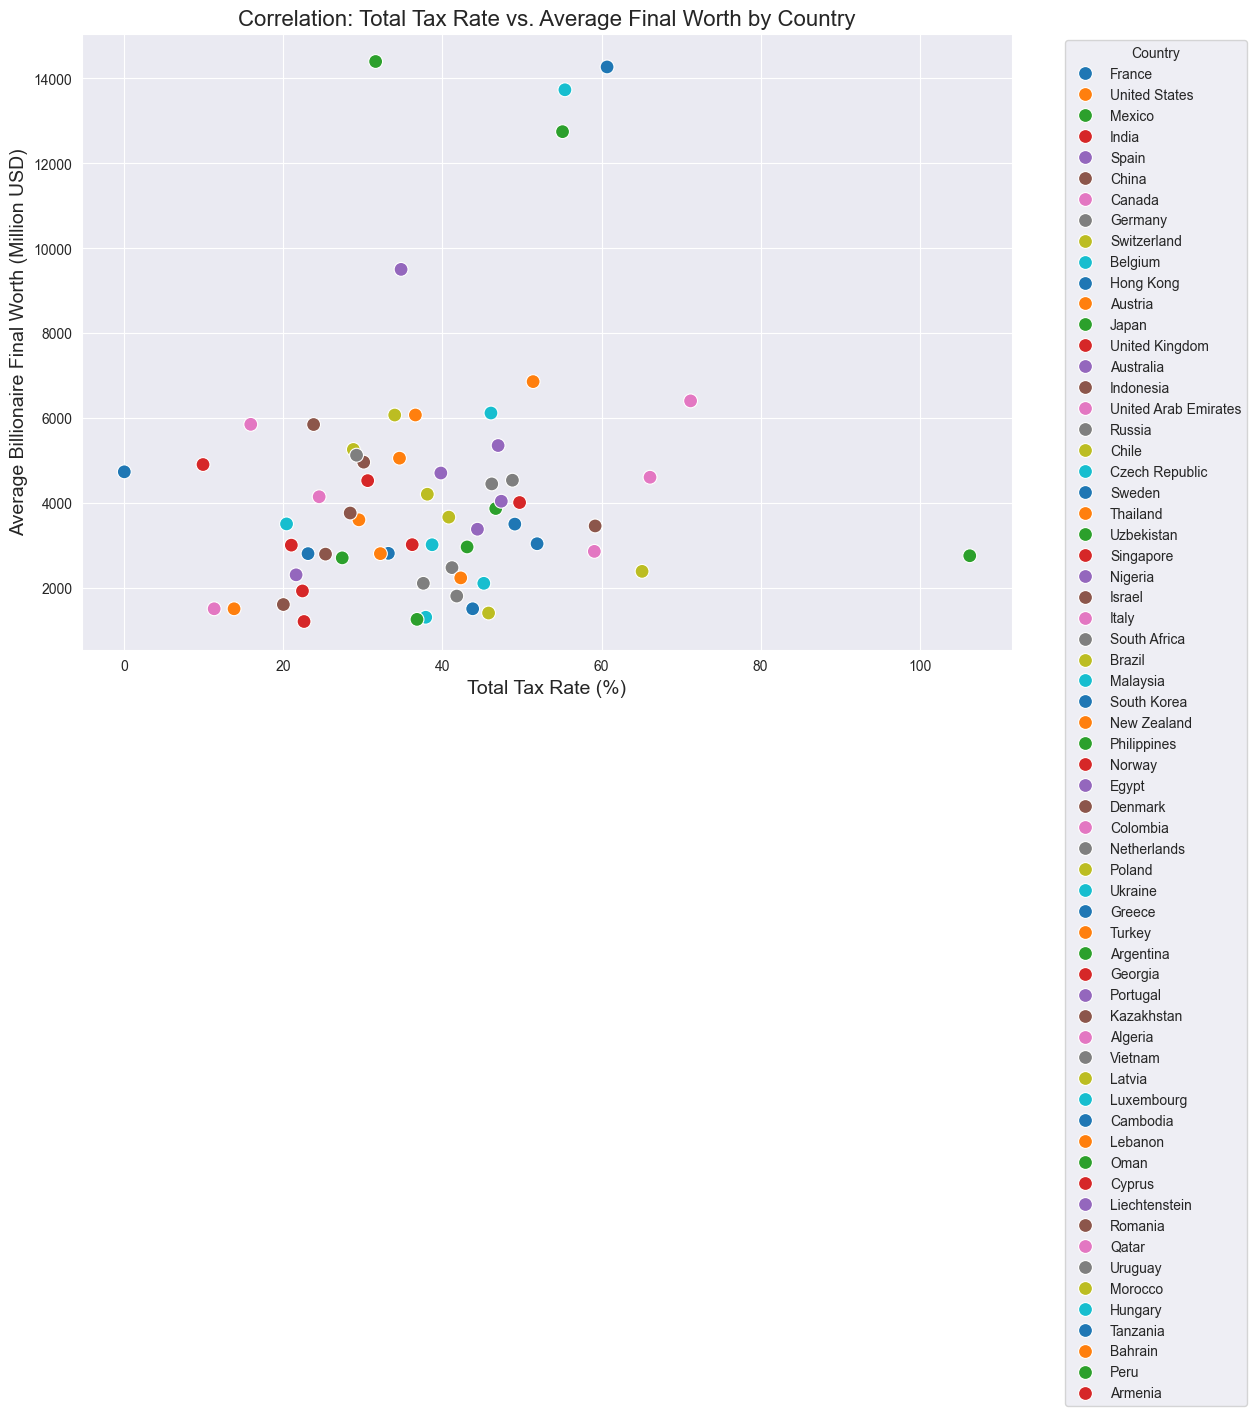

In [15]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=tax_rate_by_country,
    x='total_tax_rate_country',
    y='meanWealth',
    hue='country',
    palette='tab10',
    s=100
)

# Customize the plot
plt.title('Correlation: Total Tax Rate vs. Average Final Worth by Country', fontsize=16)
plt.xlabel('Total Tax Rate (%)', fontsize=14)
plt.ylabel('Average Billionaire Final Worth (Million USD)', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_5832/752917519.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


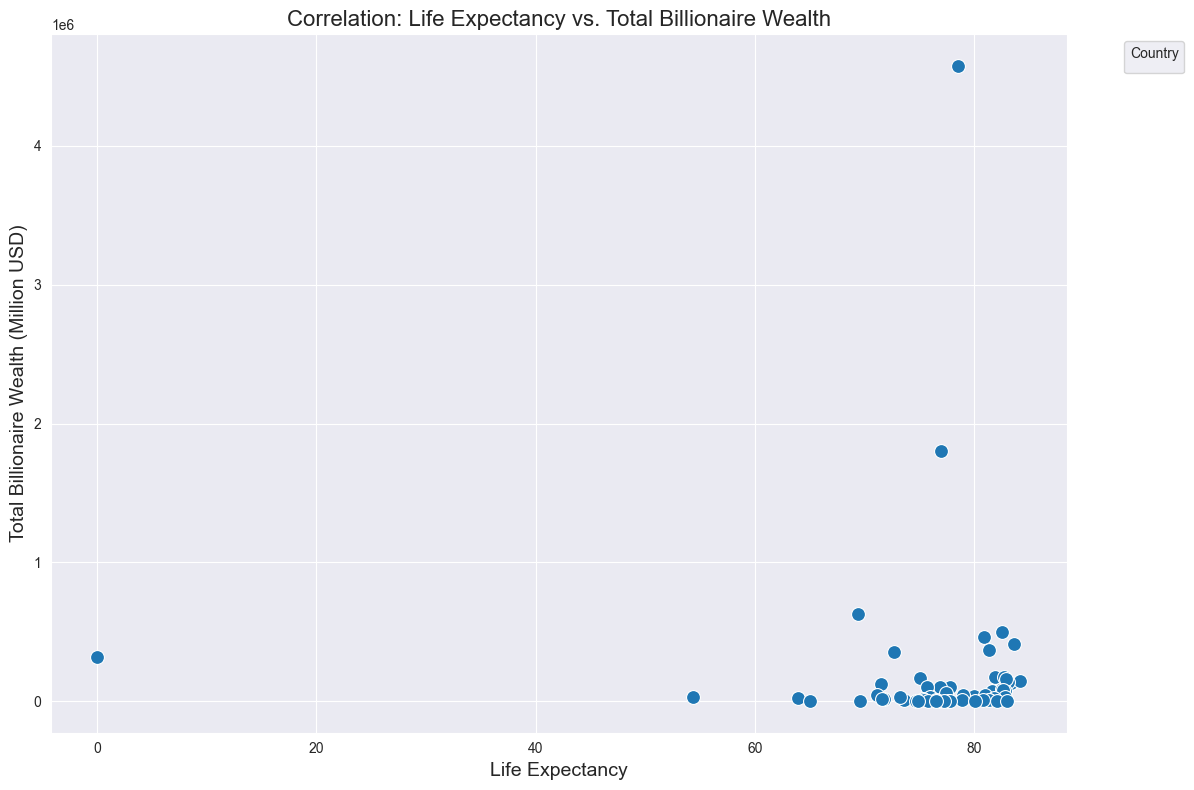

In [17]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=tax_rate_by_country,
    x='life_expectancy_country',
    y='totalWealth',
    hue=None,
    palette='tab10',
    s=100
)

# Customize the plot
plt.title('Correlation: Life Expectancy vs. Total Billionaire Wealth', fontsize=16)
plt.xlabel('Life Expectancy', fontsize=14)
plt.ylabel('Total Billionaire Wealth (Million USD)', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

Educational Indicators:
- Compare gross_primary_education_enrollment_country or gross_tertiary_education_enrollment with the number of billionaires or total wealth by country.

In [18]:
df_dropped_duplicates = df_bill_num_cat.drop_duplicates(subset='country')

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_5832/1295608811.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


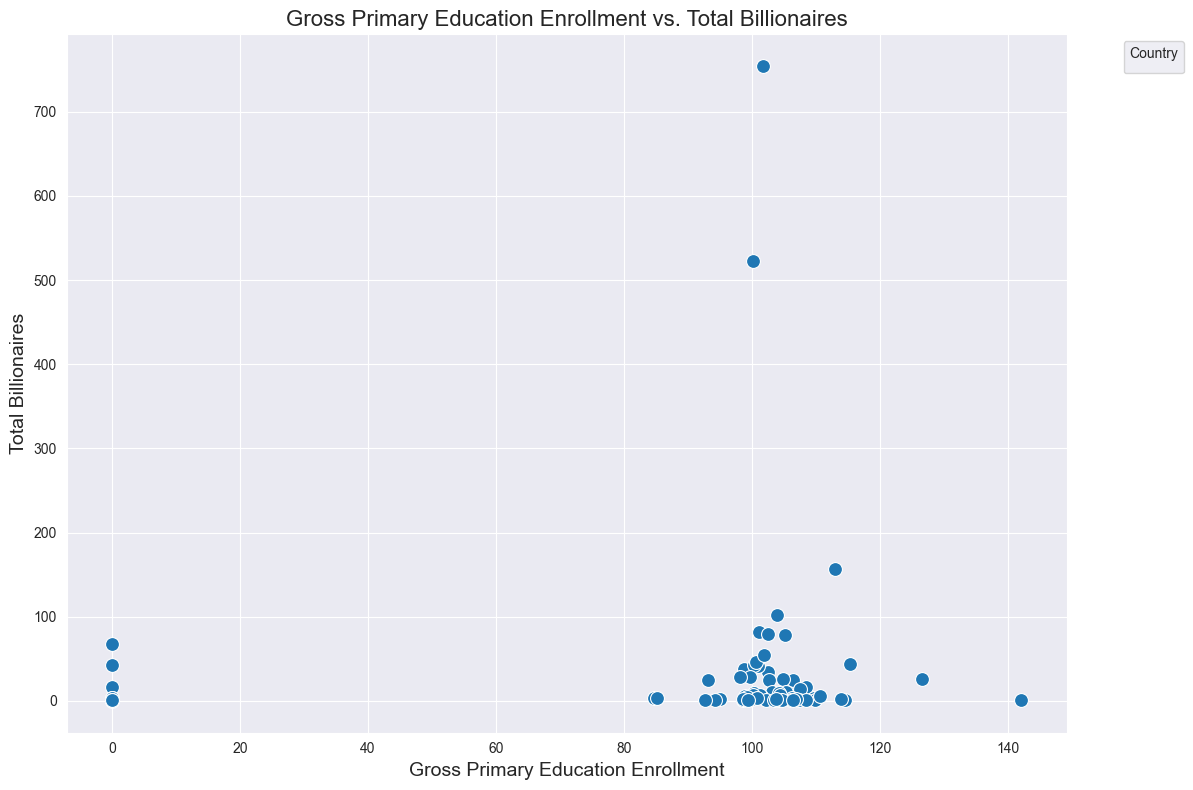

In [25]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_dropped_duplicates,
    x='gross_primary_education_enrollment_country',
    y='nBillionaires',
    hue=None,
    palette='tab10',
    s=100
)

# Customize the plot
plt.title('Gross Primary Education Enrollment vs. Total Billionaires', fontsize=16)
plt.xlabel('Gross Primary Education Enrollment', fontsize=14)
plt.ylabel('Total Billionaires', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/v6/zmyt_9xj0d7g8z7n0vv4prfh0000gn/T/ipykernel_5832/2688617615.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


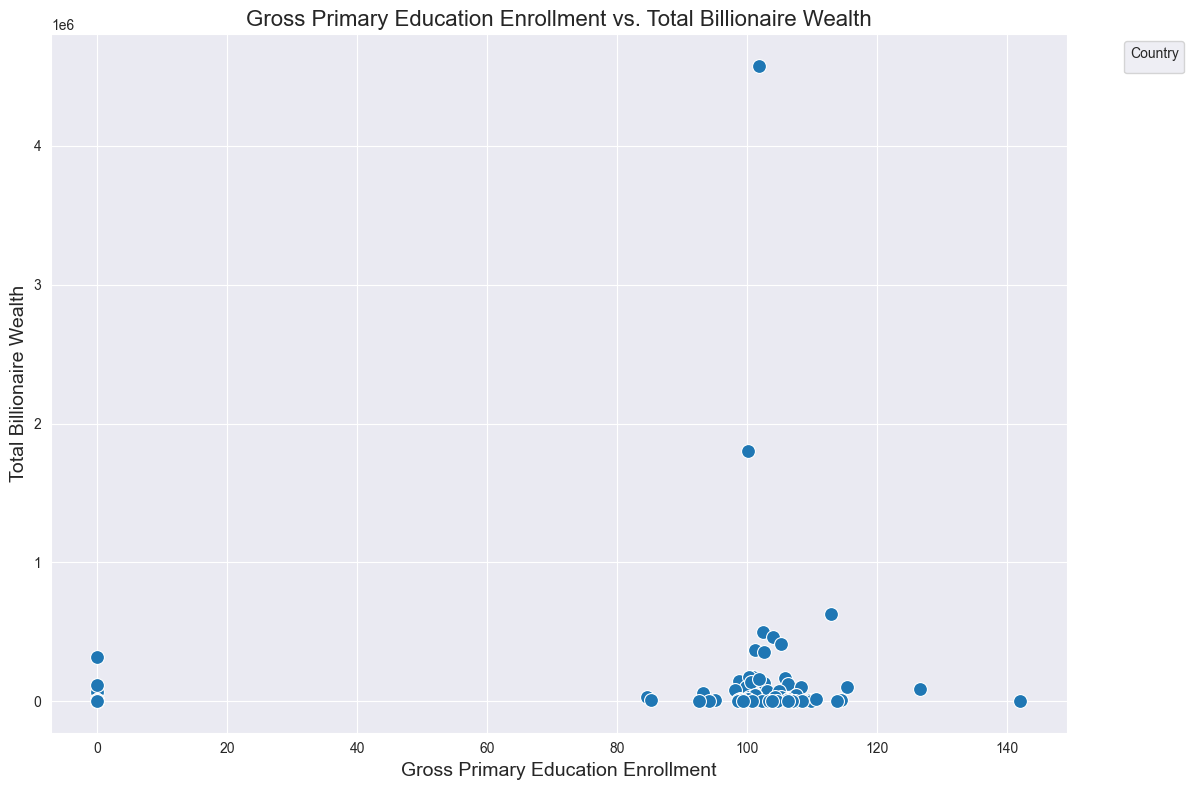

In [26]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df_dropped_duplicates,
    x='gross_primary_education_enrollment_country',
    y='totalWealth',
    hue=None,
    palette='tab10',
    s=100
)

# Customize the plot
plt.title('Gross Primary Education Enrollment vs. Total Billionaire Wealth', fontsize=16)
plt.xlabel('Gross Primary Education Enrollment', fontsize=14)
plt.ylabel('Total Billionaire Wealth', fontsize=14)
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# 1. Set up facet grid
g = sns.FacetGrid(df_dropped_duplicates, row='industries', col='gender')

# 2. Specify plot type
g.map_dataframe(sns.histplot, x='age', lw=3, fill=True)

# Use the custom function defined above
# g.map_dataframe(add_mean_line)
# get_gender = "Female" if col_name == "F" else "Male"

# 3. Customize/style the plot with methods and attributes
g.set_titles(row_template='{row_name}', col_template='{col_name}')

[]

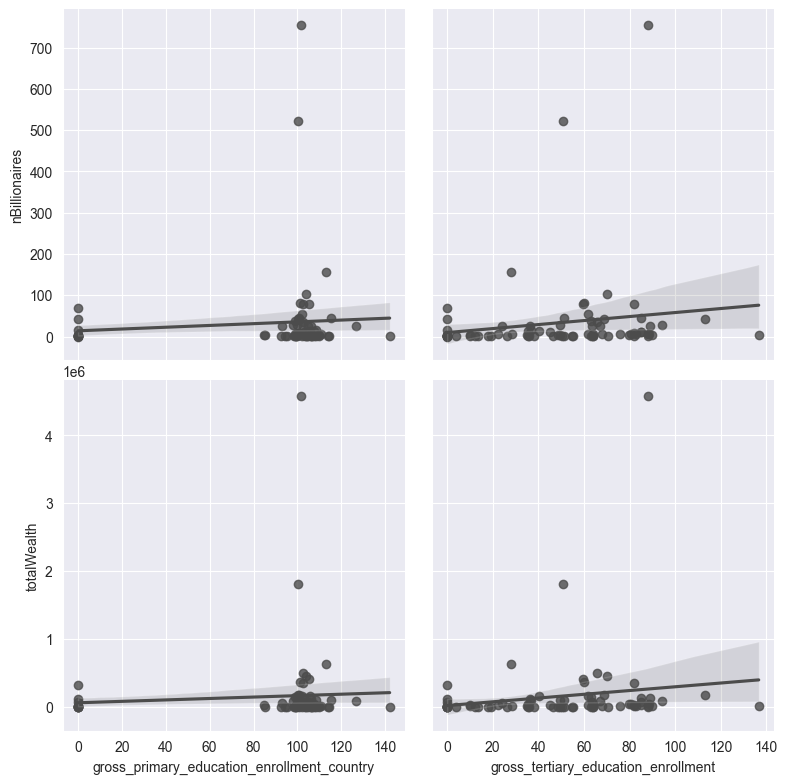

In [34]:
g = sns.PairGrid(df_dropped_duplicates, 
                 y_vars=["nBillionaires", "totalWealth"], 
                 x_vars=["gross_primary_education_enrollment_country", 
                         "gross_tertiary_education_enrollment"], 
                 height=4)

g.map(sns.regplot, color=".3")
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])
plt.plot()

[]

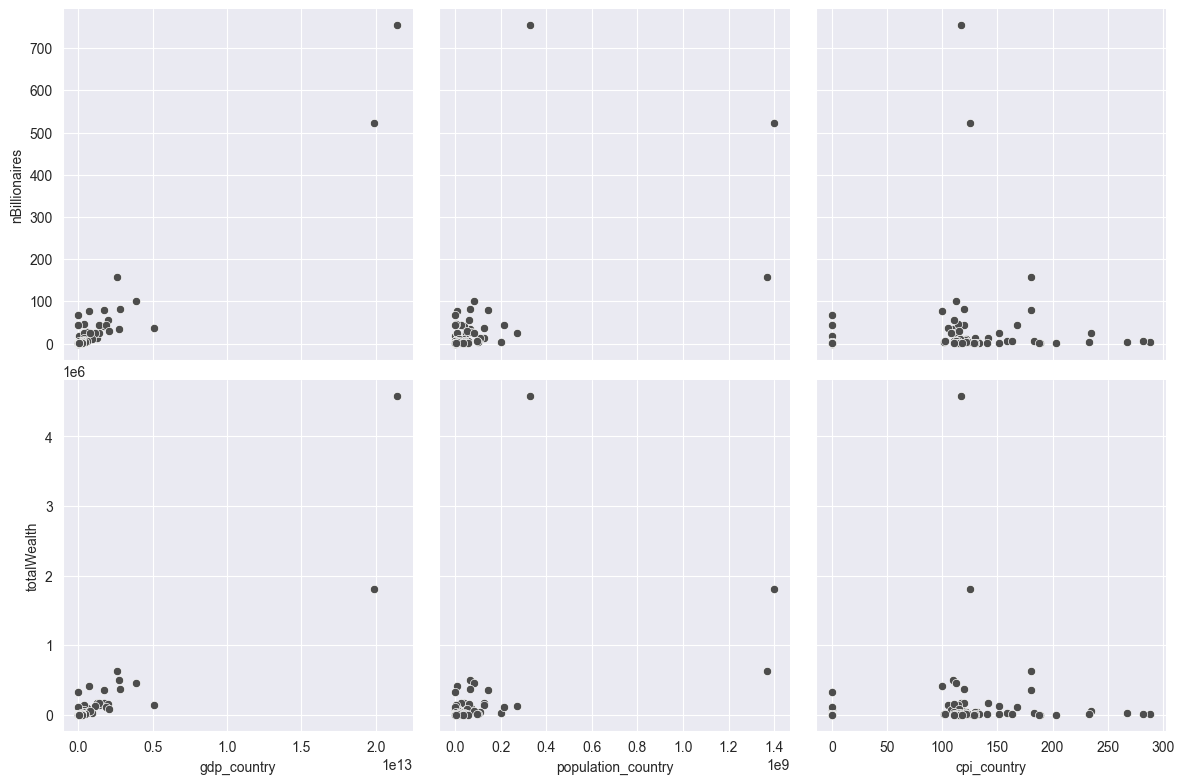

In [51]:
g = sns.PairGrid(df_dropped_duplicates, 
                 y_vars=["nBillionaires", "totalWealth"], 
                 x_vars=["gdp_country", 
                         "population_country",
                         "cpi_country"], 
                 height=4)

g.map(sns.scatterplot, color=".3")
#g.set(ylim=(-1, 11), yticks=[0, 5, 10])
plt.plot()

In [37]:
df_bill_num_cat.head()

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,gdp_country,category,country,gender,nBillionaires,totalWealth,meanWealth,state,totalWealthCat,meanWealthCat
0,1,211000,74,False,1949,3,5,110.05,1.1,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,2715518274227,Fashion & Retail,France,M,35,499500.0,14271.428571,NaN,1698800,6386.466165
1,2,180000,51,True,1971,6,28,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Automotive,United States,M,754,4575100.0,6067.771883,Texas,525300,7195.890411
2,3,114000,59,True,1964,1,12,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Washington,1877900,5980.573248
3,4,107000,78,True,1944,8,17,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Technology,United States,M,754,4575100.0,6067.771883,Hawaii,1877900,5980.573248
4,5,106000,92,True,1930,8,30,117.24,7.5,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,21427700000000,Finance & Investments,United States,M,754,4575100.0,6067.771883,Nebraska,1605100,4314.784946


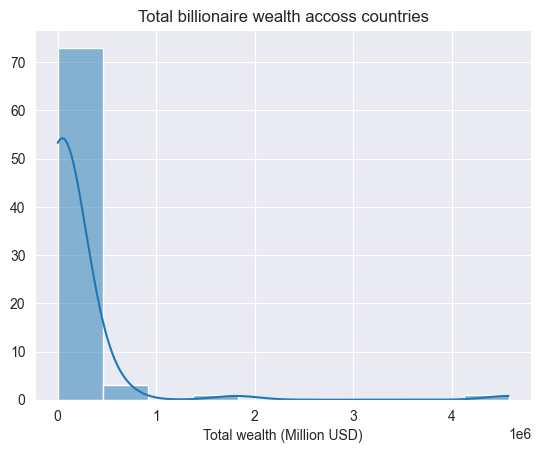

In [ ]:
sns.histplot(data=df_dropped_duplicates, x='totalWealth', kde=True, bins=10)
plt.title("Total billionaire wealth accoss countries")
plt.xlabel("Total wealth (Million USD)")
plt.ylabel(None)
plt.show()

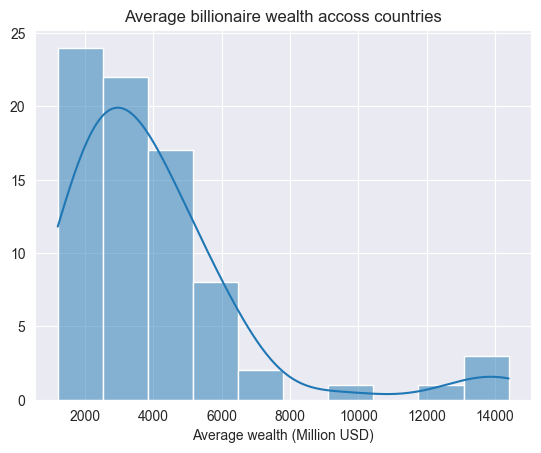

In [47]:
sns.histplot(data=df_dropped_duplicates, x='meanWealth', kde=True, bins=10)
plt.title("Average billionaire wealth accoss countries")
plt.xlabel("Average wealth (Million USD)")
plt.ylabel(None)
plt.show()